In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/flood_data.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp
df = df.sort_values('timestamp')

# Display basic info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   2 non-null      datetime64[ns]
 1   temp        2 non-null      float64       
 2   humidity    2 non-null      int64         
 3   pressure    2 non-null      int64         
 4   wind_speed  2 non-null      float64       
 5   rain_1h     2 non-null      int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 228.0 bytes
None


,timestamp,temp,humidity,pressure,wind_speed,rain_1h
0,2025-10-07 23:43:45.656266,22.84,88,1013,1.87,0
1,2025-10-08 15:04:20.942533,28.51,62,1009,2.00,0


timestamp     0
temp          0
humidity      0
pressure      0
wind_speed    0
rain_1h       0
dtype: int64


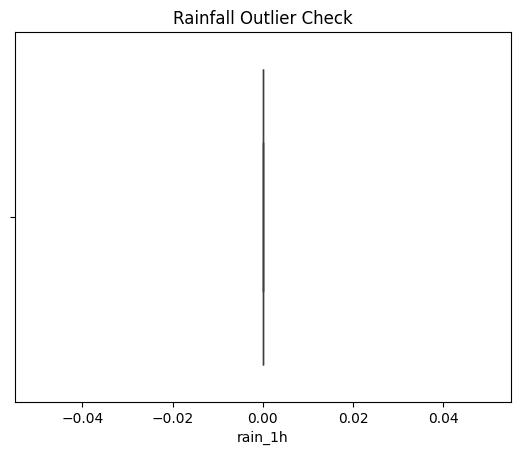

In [2]:
# Check missing
print(df.isnull().sum())

# Drop NA rows if any
df = df.dropna()

# Check for outliers
sns.boxplot(x=df['rain_1h'])
plt.title('Rainfall Outlier Check')
plt.show()


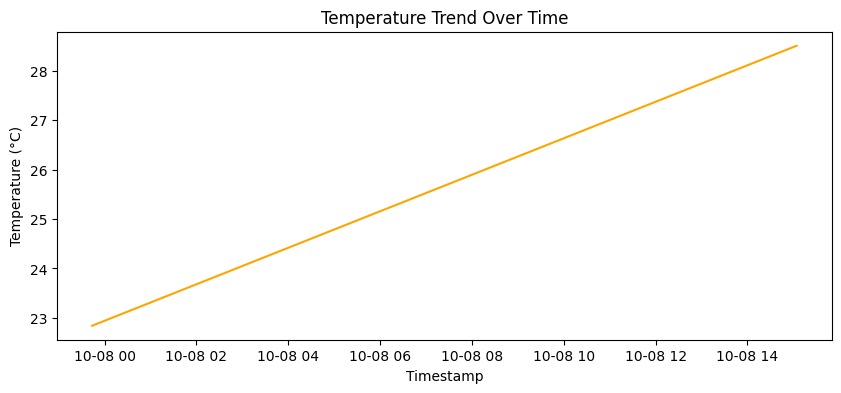

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df['timestamp'], df['temp'], color='orange')
plt.title('Temperature Trend Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.show()


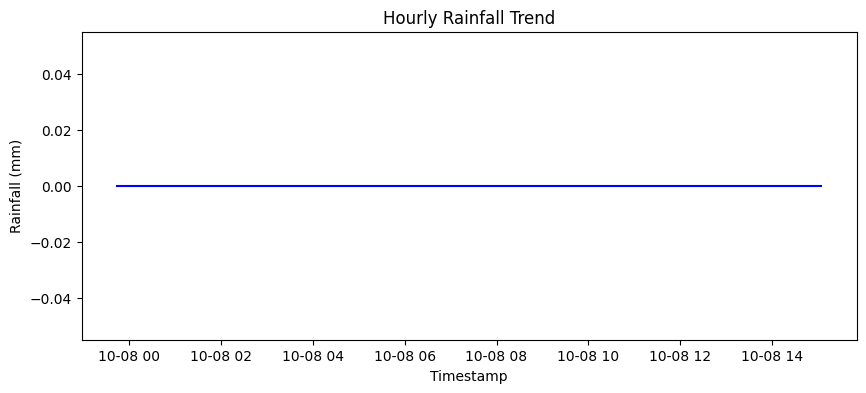

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df['timestamp'], df['rain_1h'], color='blue')
plt.title('Hourly Rainfall Trend')
plt.xlabel('Timestamp')
plt.ylabel('Rainfall (mm)')
plt.show()


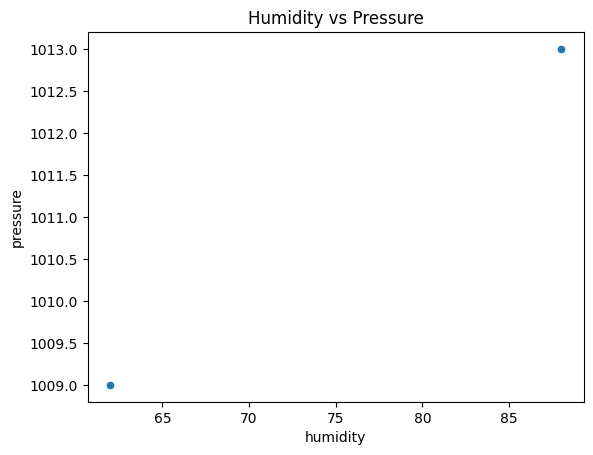

In [5]:
sns.scatterplot(x='humidity', y='pressure', data=df)
plt.title('Humidity vs Pressure')
plt.show()


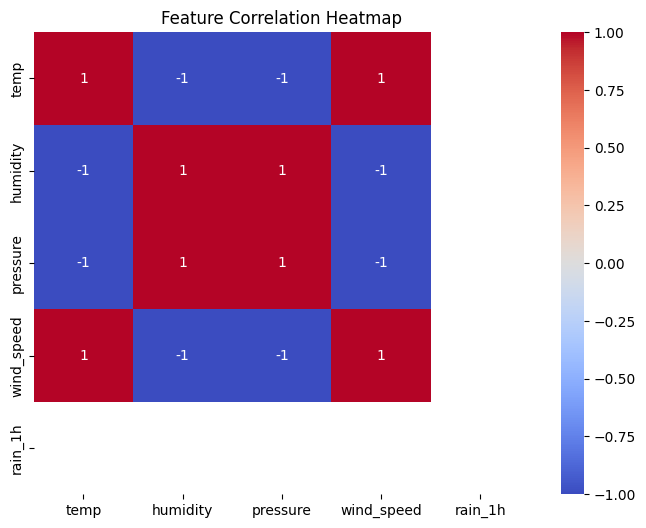

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp','humidity','pressure','wind_speed','rain_1h']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:
df.to_csv('../data/cleaned_flood_data.csv', index=False)
print("✅ Cleaned dataset saved!")


✅ Cleaned dataset saved!
